In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('/Users/bgpelkie/Code/science_jubilee/')
sys.path.append('/Users/bgpelkie/Code/science_jubilee/science_jubilee')
sys.path.append('src/')
sys.path.append('src/jubilee_pipette_bodemo')
#sys.path.append( '../')
#sys.path.append('../science_jubilee/')
# sys.path.append("C:/Users/meryp/Desktop/research/packages/bayesopt/")

from science_jubilee import Machine as Jub
from labware.Labware import Labware
#from labware.Utils import json2dict, pipette_iterator
from tools import Pipette, WebCamera
from jubilee_pipette_bodemo import color_match
from jubilee_pipette_bodemo import jubilee_protocols


import ipywidgets as widgets


import numpy as np

## Machine setup and connection

In [3]:
jubilee = Jub.Machine()

In [4]:
jubilee.home_all()

Connection error, sleeping 1 second
Connection error, sleeping 1 second
Connection error, sleeping 1 second


In [5]:
jubilee.tool_z_offsets

[-100.0, -98.02, -30.0, -38.11]

In [6]:
jubilee.move_to(z = 115)

In [7]:
deck = jubilee.load_deck('lab_automation_deck.json')
tiprack = jubilee.load_labware('opentrons_96_tiprack_300ul.json', 0)
samples = jubilee.load_labware('falcon_48_wellplate_1500ul.json', 3)
stocks = jubilee.load_labware('20mlscintillation_12_wellplate_18000ul.json', 2)
trash = jubilee.load_labware('agilent_1_reservoir_290ml.json', 1)

In [8]:
#configure pipette
P300 = Pipette.Pipette.from_config(jubilee, 1, 'pipette', 'P300_config.json')
jubilee.load_tool(P300)
P300.add_tiprack(tiprack)

Pipette tips iterated


In [10]:
#configure camera
Camera = WebCamera.Camera.from_config(jubilee, 0, 'Camera', 'WebCamera_config.json')
jubilee.load_tool(Camera)

In [25]:
jubilee.tool_z_offsets

[-100.0, -98.02, -30.0, -38.11]

## Color picking

In [12]:
a = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

In [14]:
a

ColorPicker(value='#9b3ff4', description='Pick a color')

In [15]:
hexcode = a.value

In [16]:
target_rgb = tuple(int(hexcode.lstrip('#')[i:i+2], 16) for i in (0,2,4))

In [17]:
target_rgb

(155, 63, 244)

## Set up things for demo

In [19]:
red_stock = stocks[2]
yellow_stock = stocks[1]
blue_stock = stocks[0]
trash_well = trash[0]

## Get initial data

In [58]:
P300.current_well.top

20.19

In [59]:
P300.pickup_tip()

In [49]:
jubilee.move(dz = 50)

In [69]:
P300.mix(250, 2)
# jubilee.move(dz = 2)
# P300.mix(100, 2)
# jubilee.move(dz = -2)
# P300.mix(100, 2)

Connection error, sleeping 1 second


In [60]:
jubilee.move_to(x = samples[0].x, y = samples[0].y)

In [61]:
jubilee.move_to(z = samples[0].z + 3)

In [20]:
sample_space = color_match.get_constrained_points(101)

In [71]:
n_init_points = 1
sampled_indices = np.random.randint(0, len(sample_space), size = n_init_points)
sampled_points = sample_space[sampled_indices]

In [72]:
rgb_vals = []
for i in range(len(sampled_points)):
    point = sampled_points[i,:]
    well = samples[i]
    print('creating sample')
    print(point)
    print(well)
    
    RGB = jubilee_protocols.sample_point(jubilee, P300, Camera, point, 250, well, red_stock, yellow_stock, blue_stock, trash_well)
    rgb_vals.append(RGB)

creating sample
[0.43 0.3  0.27]
Well(name='A1', depth=17.78, totalLiquidVolume=1500, shape='circular', diameter=10.38, xDimension=None, yDimension=None, x=174.5, y=180.67000000000002, z=2.41, offset=[155.6, 104.7])
Start of sample sequence position:  {'X': '219.680', 'Y': '50.680', 'Z': '136.320', 'U': '0.000', 'V': '310.000', 'E': '0.000'}
Calculated volumes:  [107.5, 75.0, 67.5]
Connection error, sleeping 1 second
Connection error, sleeping 1 second
Connection error, sleeping 1 second
Connection error, sleeping 1 second
Connection error, sleeping 1 second
Pipette tips iterated
Connection error, sleeping 1 second


In [70]:
P300.drop_tip(trash_well)

Connection error, sleeping 1 second
Pipette tips iterated


In [25]:
jubilee.park_tool()

In [25]:
image = Camera.capture_image(samples[0])

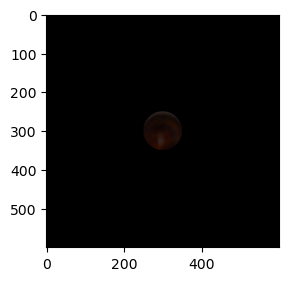

In [28]:
Camera.view_image(image, masked= True)

In [17]:
jubilee.move(dz = -5)

In [25]:
jubilee.gcode('M114')

'X:64.640 Y:175.290 Z:12.500 U:0.000 V:310.000 E:0.000 Count 38566 -13750 259883 0 62000 Machine 62.040 130.790 162.350 0.000 310.000 Bed comp 0.077\n'

In [21]:
red_thing = None

In [22]:
red_thing is None

True